In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle
import matplotlib.pyplot as plt

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-r-2-n-8-2/'
features_path = '../../data/features-generated-data-r-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]
rating_thresholds = [1, 7]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 0.47711571708834427


-----



rmse: 0.47711571708834427

auc: 0.946985440017161
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 0.47496341620194377


-----



rmse: 0.47496341620194377

auc: 0.937966633968228
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 0.47345438401636436


-----



rmse: 0.47345438401636436

auc: 0.9302976880240431
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 0.4777281744006634


-----



rmse: 0.4777281744006634

auc: 0.9317912644307947
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 0.4773004066359626


-----



rmse: 0.4773004066359626

auc: 0.9298800320721321
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 0.4767740927500822


-----



rmse: 0.4767740927500822

auc: 0.9498714501863175
Object selection: random

Dfmf

Parameters

12 10 8 8


rmse: 0.4765702286295987


-----



rmse: 0.4765702286295987

auc: 0.9362494895875866
Ob

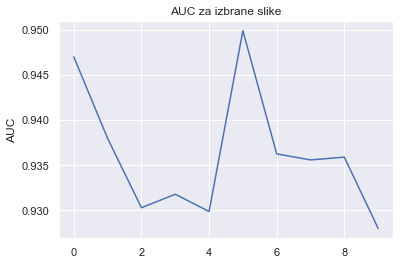

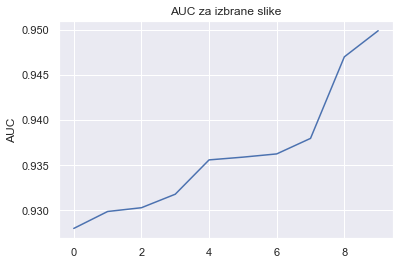

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-random.csv'
save_scores(scores, results_file)


Preselection

Object selection: knn

Dfmf

Parameters

10 10 2 4


rmse: 0.4413957408540779

auc: 0.9427209458496979

rmse: 0.4413957408540779


-----



rmse: 0.4413957408540779

auc: 0.9427209458496979

Preselection

Object selection: knn

Dfmf

Parameters

10 10 2 4


rmse: 0.4304626269512323

auc: 0.9500511204238107

rmse: 0.4304626269512323


-----



rmse: 0.4304626269512323

auc: 0.9500511204238107

Preselection

Object selection: knn

Dfmf

Parameters

10 10 2 4


rmse: 0.44120018008113415

auc: 0.942517130713852

rmse: 0.44120018008113415


-----



rmse: 0.44120018008113415

auc: 0.942517130713852

Preselection

Object selection: knn

Dfmf

Parameters

10 10 2 4


rmse: 0.44420030571729063

auc: 0.9520147830233666

rmse: 0.44420030571729063


-----



rmse: 0.44420030571729063

auc: 0.9520147830233666

Preselection

Object selection: knn

Dfmf

Parameters

10 10 2 4


rmse: 0.45006333607060484

auc: 0.9387129811094779

rmse: 0.45006333607060484


-----



rmse: 0.45006333607

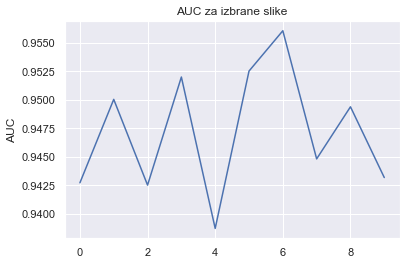

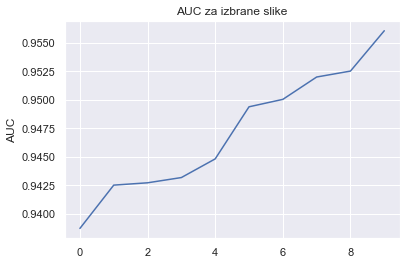

In [3]:
# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-knn.csv'
save_scores(scores, results_file)


Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.46633932256699867


-----



rmse: 0.46633932256699867

auc: 0.9369406076875142

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.47021230150863236


-----



rmse: 0.47021230150863236

auc: 0.9396905280166314

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.46252672437965625


-----



rmse: 0.46252672437965625

auc: 0.9394797691803993

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.47898496618691383


-----



rmse: 0.47898496618691383

auc: 0.9340304198476489

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.47658396352946164


-----



rmse: 0.47658396352946164

auc: 0.9422820778451977

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse: 0.4590247753805232


-----



rmse: 0.4590247753805232

auc: 0.9357456503157139

Preselection

Object selection: rf

Dfmf

Parameters

12 10 8 8


rmse:

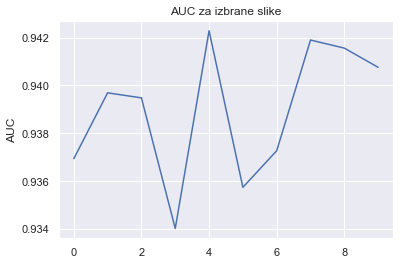

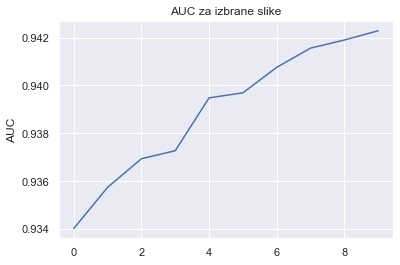

In [2]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle
import matplotlib.pyplot as plt

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-r-2-n-8-2/'
features_path = '../../data/features-generated-data-r-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]
rating_thresholds = [1, 7]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

from basic_factorization import BasicFactorization


# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-rf.csv'
save_scores(scores, results_file)

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle
import matplotlib.pyplot as plt

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-r-2-n-8-2/'
features_path = '../../data/features-generated-data-r-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]
rating_thresholds = [1, 7]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

from basic_factorization import BasicFactorization


cv_results_file = '../results/cv-generated-data-r-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-r-2-n-8-2-b.csv'
save_scores(scores, results_file)

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Object selection: random

Dfmf

auc: 0.948730946633006
Object selection: random

Dfmf

auc: 0.9478052109897349
Object selection: random

Dfmf

auc: 0.9422816679779701
Object selection: random

Dfmf

auc: 0.9460123857066888
Object selection: random

Dfmf

auc: 0.9552776643527972
Object selection: random

Dfmf

auc: 0.9565947162263522
Object selection: random

Dfmf

auc: 0.949304707638041
Object selection: random

Dfmf

auc: 0.9506781028520159
Object selection: random

Dfmf

auc: 0.9552320940265299
Object selection: random

Dfmf

auc: 0.9485536788973016
